# Maintenance Analysis Project

<p><span style="font-weight:bold; font-style">Copyright © 2020</span> - Novita</p>

In [3]:
# Import all libraries needed

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Import dataset

df = pd.read_csv('https://raw.githubusercontent.com/anshupandey/Machine_Learning_Training/master/datasets/maintenance_data.csv')
df.shape

(1000, 7)

In [5]:
# Test if our object has the right type of data

df.head()

,lifetime,broken,pressureInd,moistureInd,temperatureInd,team,provider
0,56,0,92.178854,104.230204,96.517159,TeamA,Provider4
1,81,1,72.075938,183.065701,87.271062,TeamC,Provider4
2,60,0,96.272254,77.801376,112.196170,TeamA,Provider1
3,86,1,94.406461,178.493608,72.025374,TeamC,Provider2
4,34,0,97.752899,99.413492,103.756271,TeamB,Provider1


In [6]:
# Show some basic statistical details

df.describe()

,lifetime,broken,pressureInd,moistureInd,temperatureInd
count,1000.000000,1000.000000,996.000000,1000.000000,997.000000
mean,55.195000,0.397000,98.681100,111.088723,100.553499
std,26.472737,0.489521,19.879703,41.839005,19.592059
min,1.000000,0.000000,33.481917,70.928815,42.279598
25%,34.000000,0.000000,85.562282,94.532547,87.672094
50%,60.000000,0.000000,97.311091,102.844084,100.528015
75%,80.000000,1.000000,112.253190,113.532970,113.522496
max,93.000000,1.000000,173.282541,1156.493254,172.544140


In [7]:
# We have 1000 rows of data from df.shape, 
# the info below show that there are 7 null value

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   lifetime        1000 non-null   int64  
 1   broken          1000 non-null   int64  
 2   pressureInd     996 non-null    float64
 3   moistureInd     1000 non-null   float64
 4   temperatureInd  997 non-null    float64
 5   team            1000 non-null   object 
 6   provider        1000 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 54.8+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffb6b02c828>,
      dtype=object)

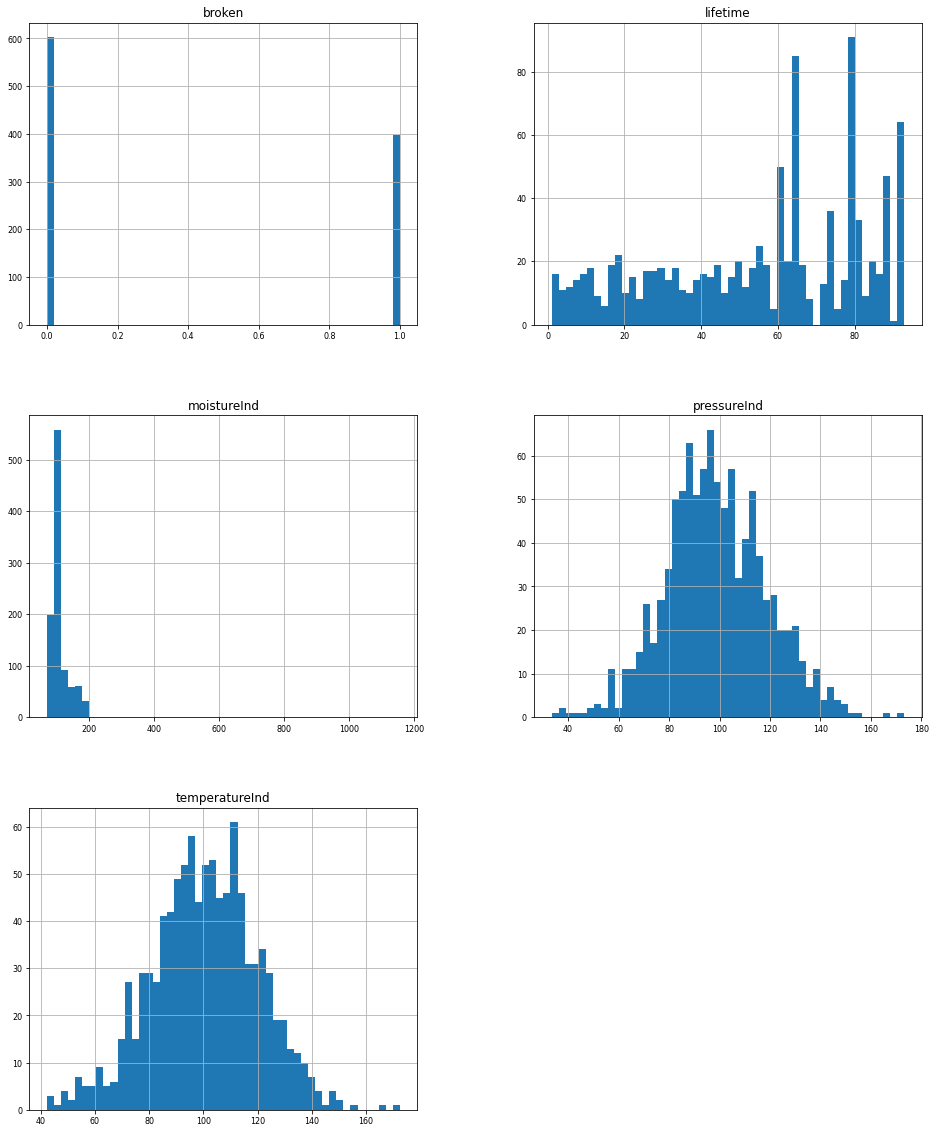

In [8]:
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [12]:
df.columns

Index(['lifetime', 'broken', 'pressureInd', 'moistureInd', 'temperatureInd',
       'team', 'provider'],
      dtype='object')

### Data cleaning

Because we want to track the reason of why machines got damaged, assume that the problem depends on which team that handing the machine, which provider that manufactures the machine, the lifetime, pressure, moisture, and of course the temperature that maybe cause the machine damage. So here I assume there is no any unwanted column(s).

In [13]:
# Handle duplicate(s)

df.duplicated().sum()

0

In [14]:
# Check for missing values

df.isnull().sum()

lifetime          0
broken            0
pressureInd       4
moistureInd       0
temperatureInd    3
team              0
provider          0
dtype: int64

Note: there is 7 missing values

In [15]:
# Drop row with >=60% missing values

df.dropna(thresh=5, inplace=True)
df.shape

(1000, 7)

In [16]:
# Check for outliers

df.skew()

lifetime          -0.407597
broken             0.421663
pressureInd        0.117541
moistureInd       15.982324
temperatureInd    -0.070839
dtype: float64

As we can see, the skew of pressure is > +0.1, so it is positively skewed, thus we fill the missing values with median. Then, we see the skew of temperature is between -0.1 and +0.1, thus we fill the missing values with the mean.

The distribution of Pressure and Temperature are shown below. Actually, pressure is almost normal distribution.

/media/novitaguok/New Volume/Bootup.ai/my_project_env/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/media/novitaguok/New Volume/Bootup.ai/my_project_env/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  2.,  1.,  1.,
         0.,  1.,  0.,  2.,  5.,  3.,  1.,  0.,  2.,  0.,  3.,  4.,  2.,
         3.,  4.,  4.,  1.,  4.,  2.,  7.,  4.,  7.,  8.,  7.,  4.,  7.,
         3.,  6., 10.,  5., 10.,  3.,  8., 14., 10., 11., 14., 14., 16.,
        14., 12., 16., 15., 18., 19., 17., 16., 16., 13., 14., 13., 19.,
        17., 16., 20., 21., 14., 13., 15., 17.,  9., 18., 15., 10., 12.,
        18., 18., 11.,  9., 11.,  8.,  7., 15.,  9., 13., 15., 19., 13.,
        14.,  7.,  7., 13.,  9.,  4., 12.,  6.,  6.,  9.,  8.,  7.,  4.,
         8.,  3.,  5.,  8.,  5.,  4.,  8.,  8.,  2.,  3.,  4.,  4.,  2.,
         2.,  1.,  4.,  3.,  2.,  5.,  1.,  1.,  3.,  0.,  0.,  2.,  4.,
         1.,  0.,  3.,  1.,  0.,  0.,  0.,  3.,  0.,  1.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.

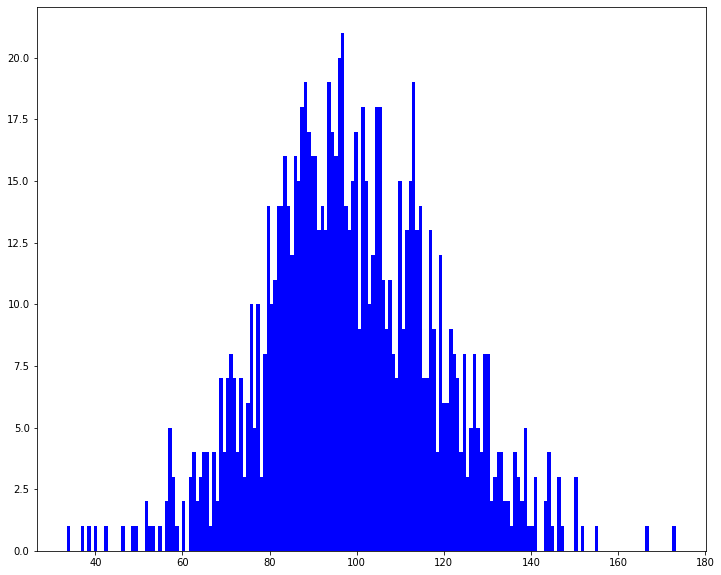

In [17]:
plt.figure(figsize=(12,10))
plt.hist(df['pressureInd'], color='blue', bins = 180)

(array([ 1.,  0.,  2.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  2.,  0.,  1.,
         0.,  1.,  2.,  3.,  2.,  2.,  1.,  2.,  0.,  2.,  2.,  1.,  3.,
         0.,  2.,  5.,  0.,  0.,  4.,  0.,  3.,  2.,  1.,  4.,  3.,  5.,
         4.,  6.,  7., 11.,  5.,  3.,  4.,  9.,  9.,  7.,  6.,  4.,  6.,
         7., 15.,  4., 10., 11.,  5., 13.,  8., 16., 13.,  9., 11., 11.,
        15., 13., 17.,  9., 18., 17., 11., 10., 21., 16., 17., 10., 12.,
        12., 22., 13., 13., 13., 19., 12., 12., 13.,  9., 12., 16., 17.,
        11.,  9., 17., 12., 18., 18., 13., 12., 14., 15.,  7.,  9., 10.,
         9.,  4.,  7., 13., 10., 11.,  8.,  9.,  5., 11.,  7.,  7.,  3.,
         7.,  8.,  2.,  7.,  6.,  1.,  4.,  3.,  5.,  6.,  1.,  2.,  4.,
         0.,  5.,  3.,  1.,  4.,  2.,  1.,  2.,  1.,  1.,  1.,  0.,  0.,
         0.,  1.,  0.,  2.,  1.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

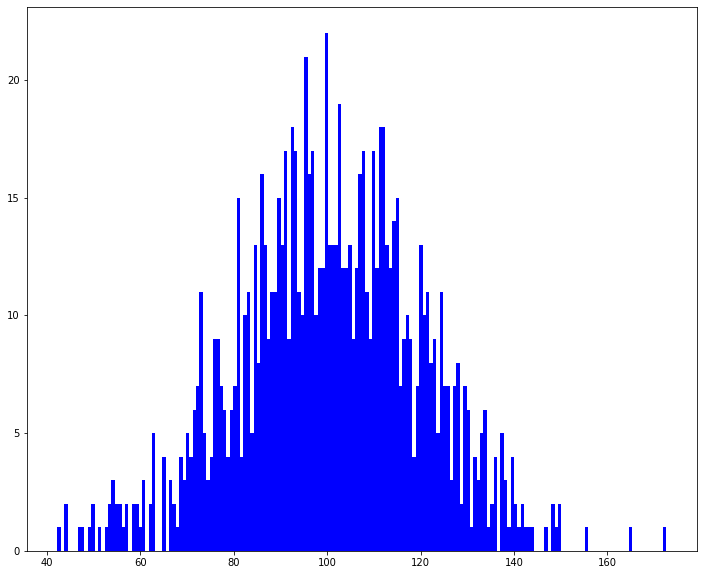

In [18]:
plt.figure(figsize=(12,10))
plt.hist(df['temperatureInd'], color='blue', bins = 180)

In [19]:
# Fill Pressure's missing values with the median of Pressure

df['pressureInd'].fillna(df['pressureInd'].median(), inplace=True)

In [20]:
# Fill Temperature's missing values with the mena of Temperature

df['temperatureInd'].fillna(df['temperatureInd'].mean(), inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   lifetime        1000 non-null   int64  
 1   broken          1000 non-null   int64  
 2   pressureInd     1000 non-null   float64
 3   moistureInd     1000 non-null   float64
 4   temperatureInd  1000 non-null   float64
 5   team            1000 non-null   object 
 6   provider        1000 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 62.5+ KB


Okay, now we have all data filled. Next, handle the duplicated rows.

In [22]:
# Drop the duplicated rows

df.drop_duplicates(inplace=True)

In [23]:
df.shape

(1000, 7)

Note: it still 1000 * 7 because no duplicated rows.

Next, we will handle outliers.

In [24]:
df.skew()

lifetime          -0.407597
broken             0.421663
pressureInd        0.118601
moistureInd       15.982324
temperatureInd    -0.070945
dtype: float64

If skewness > +1 or < -1, then it presents outliers. From the information above, we can see that Moisture presents outliers. Below I will visualize the outliers with Boxplot.

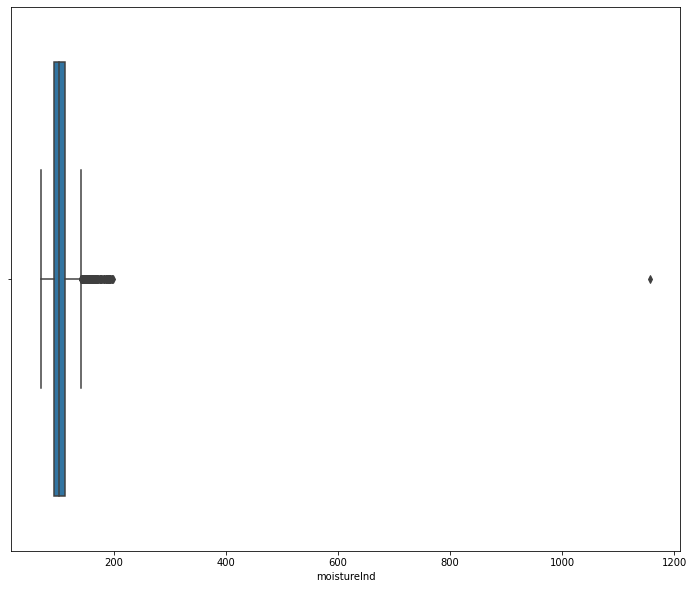

In [25]:
# Discover outliers with visualization tools

plt.figure(figsize=(12, 10))
sns.boxplot(x=df['moistureInd'])

From the visualization above, notice the "dot" at x > 1000. It presents outliers in Moisture data. I will handle the outliers with dropping the row.

I follow Mr. Anshu's technique in handling outliers, and this is what I got. Later I will also use other techniques that I've read from medium.com, they are IQR and Z Score Method.

In [26]:
df2 = df[df["moistureInd"] < df["moistureInd"].quantile(0.99)]

In [27]:
df2.shape

(990, 7)

In [28]:
df2['moistureInd'].skew()

1.5624833281076242

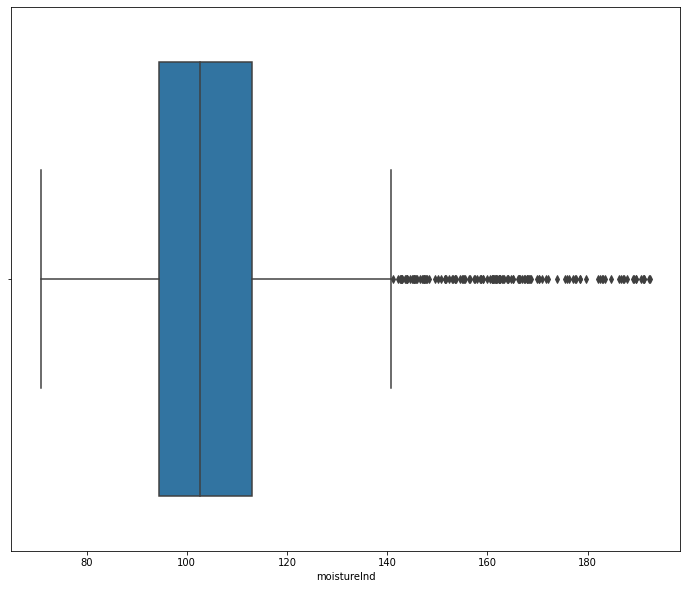

In [29]:
plt.figure(figsize=(12, 10))
sns.boxplot(x=df2['moistureInd'])

Here I will try to remove outliers with 2 ways as I read from medium.com, using IQR (Interquartile Range) and also Z Score Method. But first I will copy the dataframe to df2 and df3 so that we can see the difference.

#### 1. IQR

In [30]:
# Copy dataframe to df3

df3 = df

In [31]:
df3.head()

,lifetime,broken,pressureInd,moistureInd,temperatureInd,team,provider
0,56,0,92.178854,104.230204,96.517159,TeamA,Provider4
1,81,1,72.075938,183.065701,87.271062,TeamC,Provider4
2,60,0,96.272254,77.801376,112.196170,TeamA,Provider1
3,86,1,94.406461,178.493608,72.025374,TeamC,Provider2
4,34,0,97.752899,99.413492,103.756271,TeamB,Provider1


In [32]:
Q1 = df3['moistureInd'].quantile(0.25)
Q3 = df3['moistureInd'].quantile(0.75)
IQR = Q3 - Q1
print("Q1: ", Q1)
print("Q3: ", Q3)
print("IQR: ", IQR)
lower_whisker = Q1 - 1.5*IQR
upper_whisker = Q3 + 1.5*IQR
print("LW: ", lower_whisker, "UW: ", upper_whisker)

Q1:  94.53254653249999
Q3:  113.532970475
IQR:  19.000423942500007
LW:  66.03191061874998 UW:  142.03360638875


In [33]:
df3.shape

(1000, 7)

In [34]:
df3 = df3[df3['moistureInd'] < upper_whisker]

In [35]:
df3.shape

(858, 7)

In [36]:
df3 = df3[df3['moistureInd'] > lower_whisker]

In [37]:
df3.shape

(858, 7)

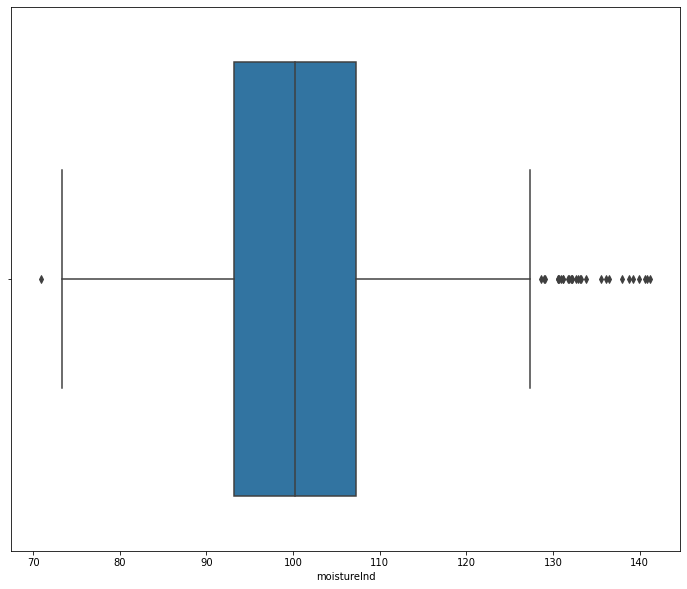

In [38]:
plt.figure(figsize=(12, 10))
sns.boxplot(x=df3['moistureInd'])

In [39]:
df3['moistureInd'].skew()

0.5657660680826198

Better skewness! Let's see the alternative way!

#### 2. Z Score Method

As what I read from https://medium.com/analytics-vidhya/outlier-treatment-9bbe87384d02, the criteria to identify an outlier are data points that falls outside of 3 standard deviations. We can use a Z Score and if the Z Score falls outside of 2 standard deviation. I will copy the original dataframe to df3.

In [40]:
# Copy to df4

df4 = df

In [41]:
df4.head()

,lifetime,broken,pressureInd,moistureInd,temperatureInd,team,provider
0,56,0,92.178854,104.230204,96.517159,TeamA,Provider4
1,81,1,72.075938,183.065701,87.271062,TeamC,Provider4
2,60,0,96.272254,77.801376,112.196170,TeamA,Provider1
3,86,1,94.406461,178.493608,72.025374,TeamC,Provider2
4,34,0,97.752899,99.413492,103.756271,TeamB,Provider1


In [42]:
df4.shape

(1000, 7)

In [43]:
# Import Scipy

from scipy import stats

z = np.abs(stats.zscore(df4['moistureInd']))

print(z)

[1.64008446e-01 1.72119280e+00 7.96003708e-01 1.61185987e+00
 2.79190982e-01 1.10563169e-01 6.07069649e-01 1.95987177e+00
 1.72252617e-01 2.10554846e+00 3.48063467e-04 3.58239226e-01
 4.43032086e-01 4.09279153e-01 1.77328221e-01 3.28230474e-01
 1.89243603e-01 3.62566031e-01 5.97273310e-01 7.13888071e-02
 1.81401117e-01 1.93101886e-01 2.20090500e-01 5.10185469e-01
 1.38452240e-01 1.15692261e-01 1.85183122e-01 4.38437224e-01
 6.22540095e-01 1.80099876e-01 4.64690245e-01 6.87971216e-03
 4.30842675e-01 4.31665934e-01 1.90372611e+00 6.96076923e-01
 6.94710044e-01 1.91868469e+00 6.27021179e-01 5.41441982e-01
 1.72863817e+00 1.94239153e+00 2.09202963e-01 1.59192143e+00
 2.17677878e-01 1.65670285e-01 8.09330090e-02 7.43729637e-02
 4.60760136e-01 4.57291893e-01 1.79648403e+00 1.86642498e+00
 2.24673929e-01 1.47213441e-01 1.82251037e+00 1.46100286e-01
 3.81817162e-01 1.95208968e-01 1.91719448e+00 3.06309554e-01
 2.23296780e-01 5.30193944e-01 1.63100605e-01 1.25253889e-01
 1.91685286e-01 1.600566

In [44]:
threshold = 3
print(np.where(z>threshold))

(array([604]),)


In [45]:
df5 = df4[(z<threshold)]
print(df5)

     lifetime  broken  pressureInd  moistureInd  temperatureInd   team  \
0          56       0    92.178854   104.230204       96.517159  TeamA   
1          81       1    72.075938   183.065701       87.271062  TeamC   
2          60       0    96.272254    77.801376      112.196170  TeamA   
3          86       1    94.406461   178.493608       72.025374  TeamC   
4          34       0    97.752899    99.413492      103.756271  TeamB   
..        ...     ...          ...          ...             ...    ...   
995        88       1    88.589759   112.167556       99.861456  TeamB   
996        88       1   116.727075   110.871332       95.075631  TeamA   
997        22       0   104.026778    88.212873       83.221220  TeamB   
998        78       0   104.911649   104.257296       83.421491  TeamA   
999        63       0   116.901354    99.998694       47.641493  TeamB   

      provider  
0    Provider4  
1    Provider4  
2    Provider1  
3    Provider2  
4    Provider1  
..       

In [46]:
df5.shape

(999, 7)

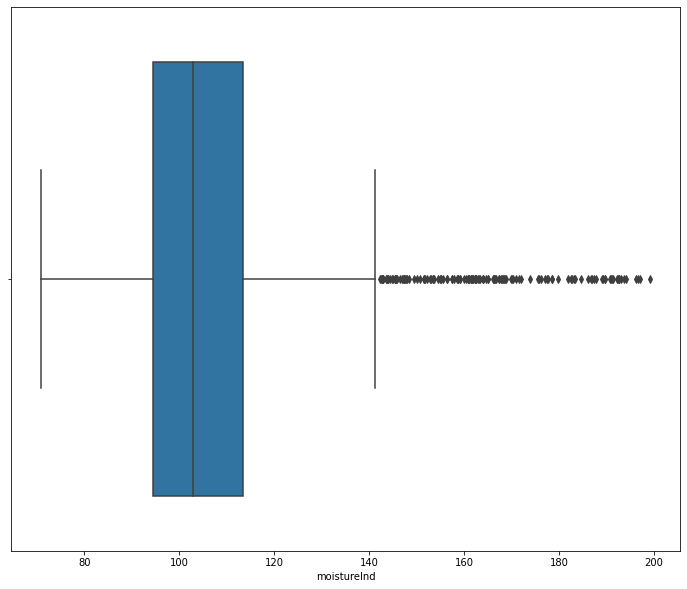

In [47]:
plt.figure(figsize=(12, 10))
sns.boxplot(x=df5['moistureInd'])

In [48]:
df5['moistureInd'].skew()

1.5885254633754298

However, Z Score Method is usually works only for large datasets, so I use the first method -- IQR.

Here I will show overall boxplots of each numerical variables (with df3, because the most normal)

<Figure size 432x288 with 0 Axes>

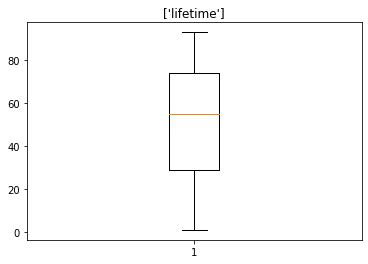

<Figure size 432x288 with 0 Axes>

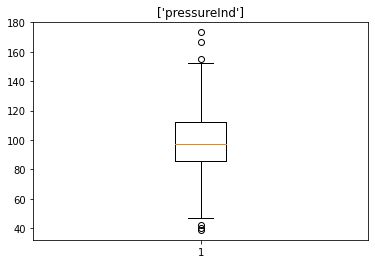

<Figure size 432x288 with 0 Axes>

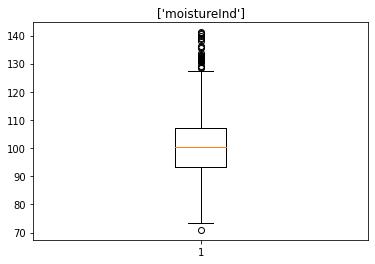

<Figure size 432x288 with 0 Axes>

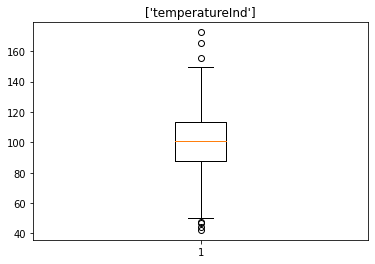

In [49]:
df3_num_cols = df3.drop(columns=['team', 'provider', 'broken'])
for col in df3_num_cols:
    plt.figure(figsize=(6,4))
    fig, ax = plt.subplots()
    ax.set_title([col])
    ax.boxplot(df3[col])

### Univariate Analysis

Here are the graphical analysis.

In [50]:
# I am using IQR method (df3)

df3.columns

Index(['lifetime', 'broken', 'pressureInd', 'moistureInd', 'temperatureInd',
       'team', 'provider'],
      dtype='object')

In [51]:
cat_cols = ['broken', 'team', 'provider']
num_cols = ['lifetime', 'pressureInd', 'moistureInd', 'temperatureInd']

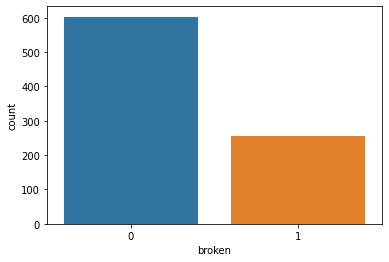

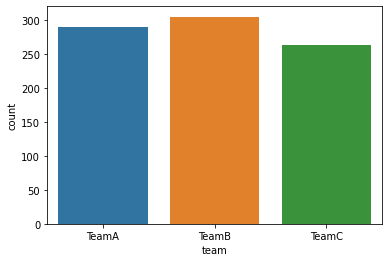

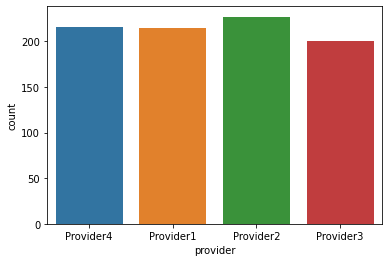

In [52]:
# Visualization for categorical data

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(df3[col])
    plt.show

Analytics:
- There are about 30% damaged machine and 70% undamaged.
- In handing machine, there are 35.5% from team A, 33.8% from team B, and 30.7% from team C.
- The provider of machines are 26.5% provider 1, 25.2% provider 2, 25.0% provider 3, and 23.3% provider 4.

In [53]:
df3['broken'].value_counts(normalize=True)

0    0.702797
1    0.297203
Name: broken, dtype: float64

In [54]:
df3['team'].value_counts(normalize=True)

TeamB    0.355478
TeamA    0.337995
TeamC    0.306527
Name: team, dtype: float64

In [55]:
df3['provider'].value_counts(normalize=True)

Provider2    0.264569
Provider4    0.251748
Provider1    0.250583
Provider3    0.233100
Name: provider, dtype: float64

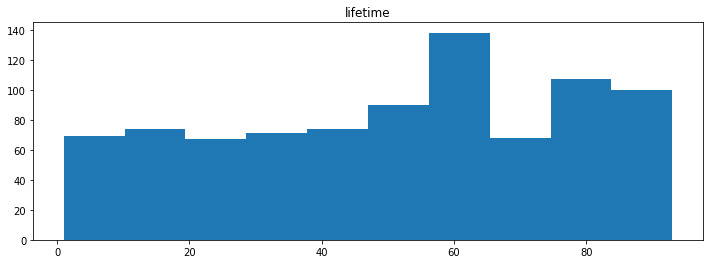

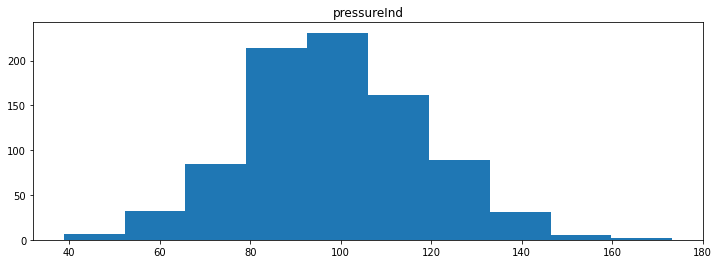

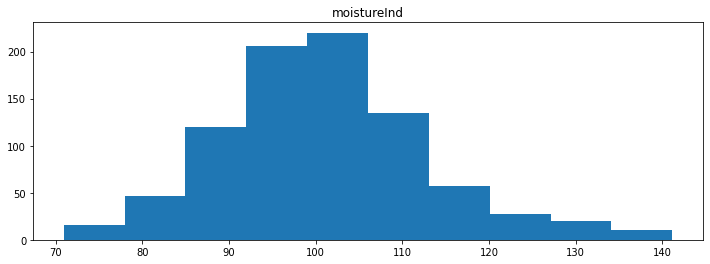

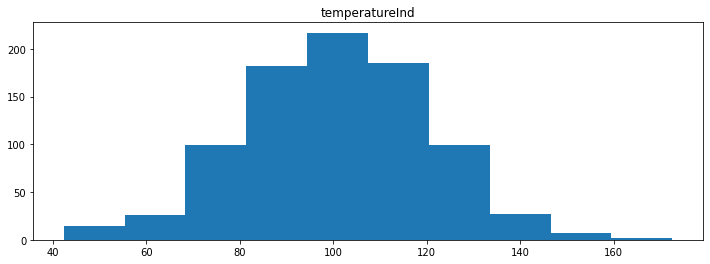

In [56]:
# Visualization for numerical data

for col in num_cols:
    plt.figure(figsize=(12,4))
    plt.hist(df3[col])
    plt.title(col)
    plt.show()

Analytics:
- Pressure, moisture, and temperature are uniform distributed.
- Most of machines' lifetime are 60 months.

### Bivariate Analysis

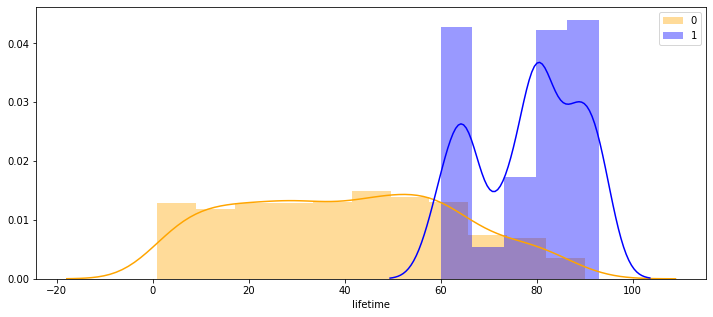

In [57]:
# Lifetime vs Broken

plt.figure(figsize=(12,5))
sns.distplot(df3['lifetime'][df3['broken']==0], color='orange')
sns.distplot(df3['lifetime'][df3['broken']==1], color='blue')
plt.legend(["0", "1"])
plt.show()

Machines with lifetime > 60 are tend to got damaged.

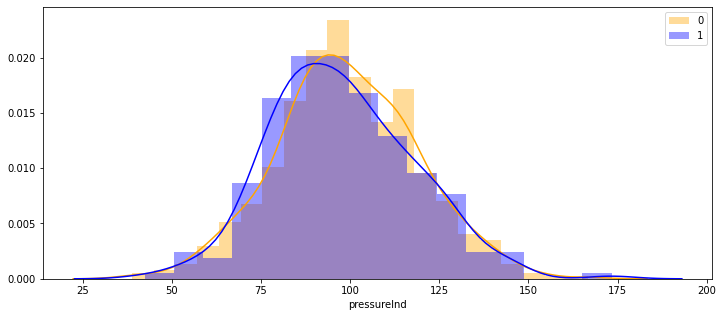

In [58]:
# Pressure vs Broken

plt.figure(figsize=(12,5))
sns.distplot(df3['pressureInd'][df3['broken']==0], color='orange')
sns.distplot(df3['pressureInd'][df3['broken']==1], color='blue')
plt.legend(["0", "1"])
plt.show()

Both the distributions of Pressure with Broken = 0 and Broken = 1 are almost overlapping each other, thus at every value of Pressure, there is almost similar density of machine damaged and undamaged. Thus Pressure has no information to say why the machine got damaged.

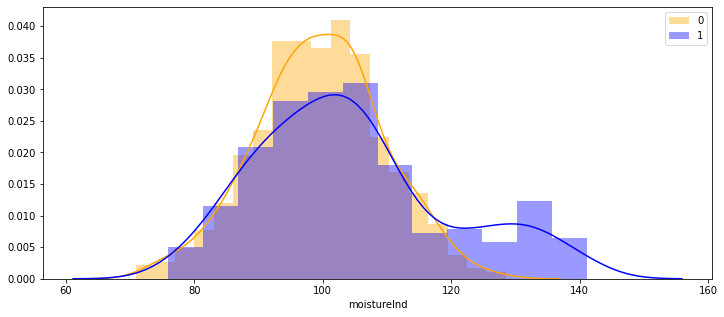

In [59]:
# Moisture vs Broken

plt.figure(figsize=(12,5))
sns.distplot(df3['moistureInd'][df3['broken']==0], color='orange')
sns.distplot(df3['moistureInd'][df3['broken']==1], color='blue')
plt.legend(["0", "1"])
plt.show()

From the histogram above, we also can't conclude that moisture causes machines damage.

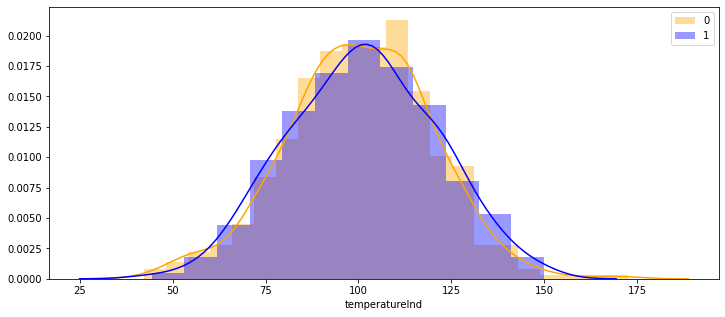

In [60]:
# Temperature vs Broken

plt.figure(figsize=(12,5))
sns.distplot(df3['temperatureInd'][df3['broken']==0], color='orange')
sns.distplot(df3['temperatureInd'][df3['broken']==1], color='blue')
plt.legend(["0", "1"])
plt.show()

Both the distributions of Temperature with Broken = 0 and Broken = 1 are almost overlapping each other, thus at every value of Temperature, there is almost similar density of machine damaged and undamaged. Thus Temperature has no information to say why the machine got damaged.

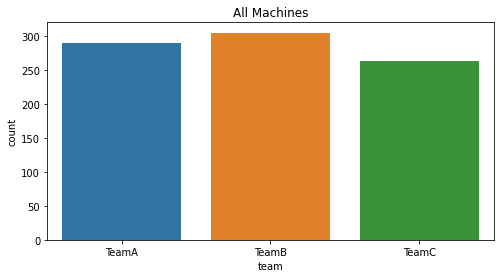

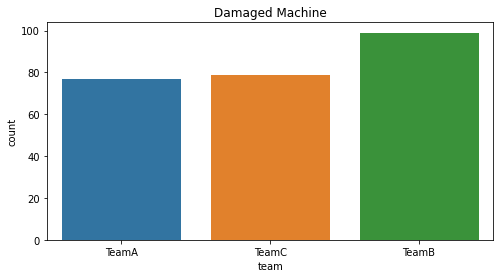

In [61]:
# Damaged machines by teams

plt.figure(figsize=(8,4))
sns.countplot(df3['team'])
plt.title("All Machines")
plt.show()
plt.figure(figsize=(8,4))
sns.countplot(df3['team'][df3["broken"]==1])
plt.title("Damaged Machine")
plt.show()

In [62]:
out = pd.crosstab(df3['team'], df3['broken'], margins=True)
out

broken,0,1,All
team,,,
TeamA,213,77,290
TeamB,206,99,305
TeamC,184,79,263
All,603,255,858


In [63]:
out[1]/out['All']

team
TeamA    0.265517
TeamB    0.324590
TeamC    0.300380
All      0.297203
dtype: float64

Team B's machines tend to be damaged than the others.

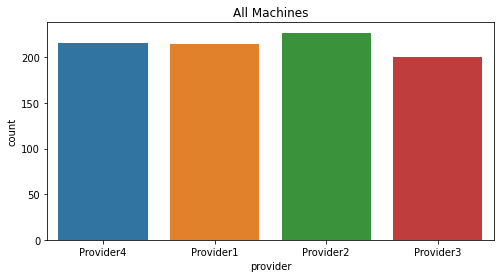

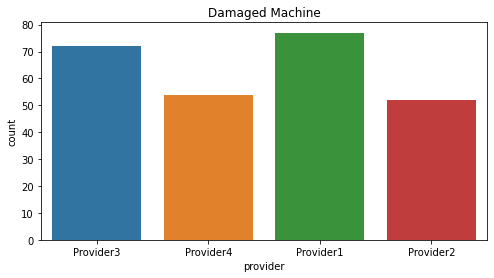

In [64]:
# Damaged machines by providers

plt.figure(figsize=(8,4))
sns.countplot(df3['provider'])
plt.title("All Machines")
plt.show()
plt.figure(figsize=(8,4))
sns.countplot(df3['provider'][df3["broken"]==1])
plt.title("Damaged Machine")
plt.show()

In [65]:
out = pd.crosstab(df3['provider'], df3['broken'], margins=True)
out

broken,0,1,All
provider,,,
Provider1,138,77,215
Provider2,175,52,227
Provider3,128,72,200
Provider4,162,54,216
All,603,255,858


In [66]:
out[1]/out['All']

provider
Provider1    0.358140
Provider2    0.229075
Provider3    0.360000
Provider4    0.250000
All          0.297203
dtype: float64

Provider 3's machines seems to have higher damage probability.

### Multivariate Analysis

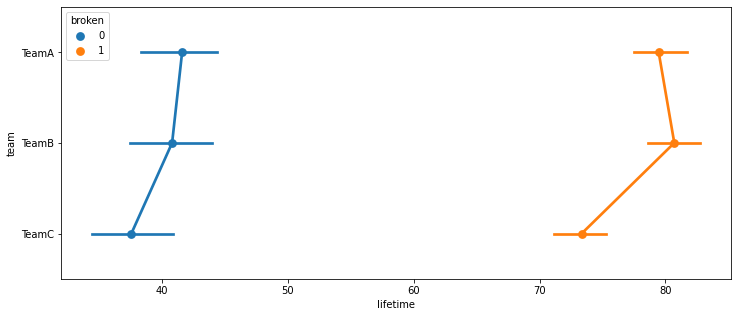

In [67]:
plt.figure(figsize=(12,5))
sns.pointplot(x="lifetime", y="team", hue="broken", data=df3)
plt.show()

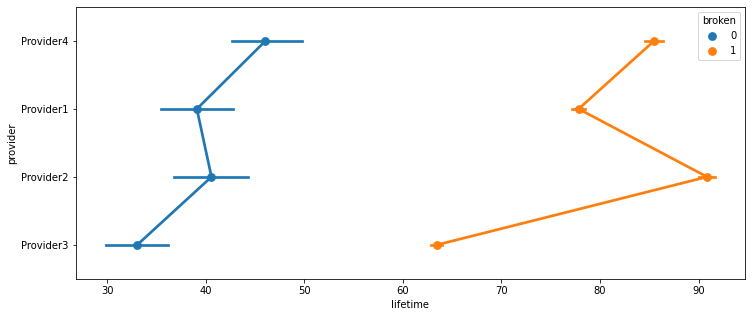

In [68]:
plt.figure(figsize=(12,5))
sns.pointplot(x="lifetime", y="provider", hue="broken", data=df3)
plt.show()

For correlation matrix, firstly I will drop categorical columns.

In [158]:
df6 = df3.drop(columns=['broken', 'team', 'provider'])

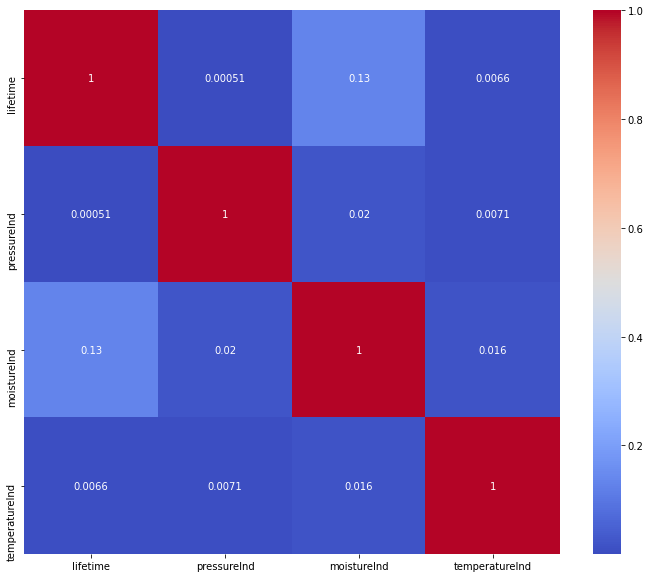

In [159]:
cor = df6.corr()
plt.figure(figsize=(12,10))
sns.heatmap(cor, annot=True, cmap="coolwarm")
plt.show()

Logically, there aren't any relationship between numerical data in this case, so you won't see any "red area".

I also show the pairplot of the dataset to understand the best set of features to explain a relationship between 2 variables or to form the most separated clusters.

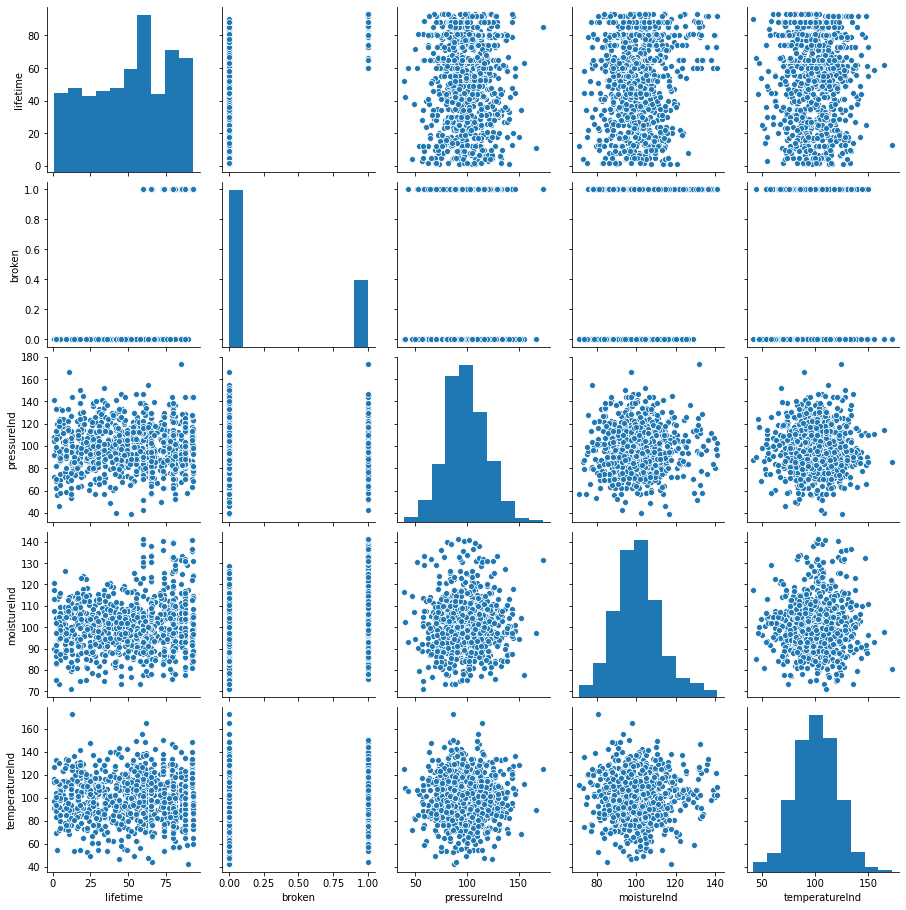

In [71]:
sns.pairplot(df3)

### Some questions to answer

Here are some questions that we can answer based on previous data visualizations.

1. What is the average temperature of machine that is broken?

In [72]:
df3['temperatureInd'][df['broken']==1].mean()

101.20213357783472

2. How long is the longest lifetime of machines?

In [73]:
df3['lifetime'].max()

93

3. Who is the provider and the team that handing the machine with the longest lifetime?

In [74]:
# The longest lifetime based on provider and team

(df3.groupby(['provider', 'team'])['lifetime'].max()).max()

93

In [75]:
df3.groupby(['provider', 'team'])['lifetime'].max()

provider   team 
Provider1  TeamA    80
           TeamB    80
           TeamC    74
Provider2  TeamA    93
           TeamB    93
           TeamC    86
Provider3  TeamA    66
           TeamB    66
           TeamC    60
Provider4  TeamA    89
           TeamB    88
           TeamC    82
Name: lifetime, dtype: int64

From the information above, Provider 2 with Team A and Team B is the provider and team with the longest lifetime machine.

### Prediction

I want to try to predict the lifetime of new machine from a specific team, let's say team A.

In [152]:
# Because the 'team' column is categorical, we need to encode it first
# Copy df3 to y so that whatever happen, the original data still safe

from sklearn.preprocessing import LabelEncoder
import copy

y = df3.copy()

lb_make = LabelEncoder()
y['team'] = lb_make.fit_transform(df3['team'])
y['provider'] = lb_make.fit_transform(df3['provider'])
y.head()

,lifetime,broken,pressureInd,moistureInd,temperatureInd,team,provider
0,56,0,92.178854,104.230204,96.517159,0,3
2,60,0,96.272254,77.801376,112.196170,0,0
4,34,0,97.752899,99.413492,103.756271,1,0
5,30,0,87.678801,115.712262,89.792105,0,0
6,68,0,94.614174,85.702236,142.827001,1,1


In [153]:
y.shape

(858, 7)

In [154]:
# Check the correlation between 'team' and 'lifetime'

corr = y.corr()

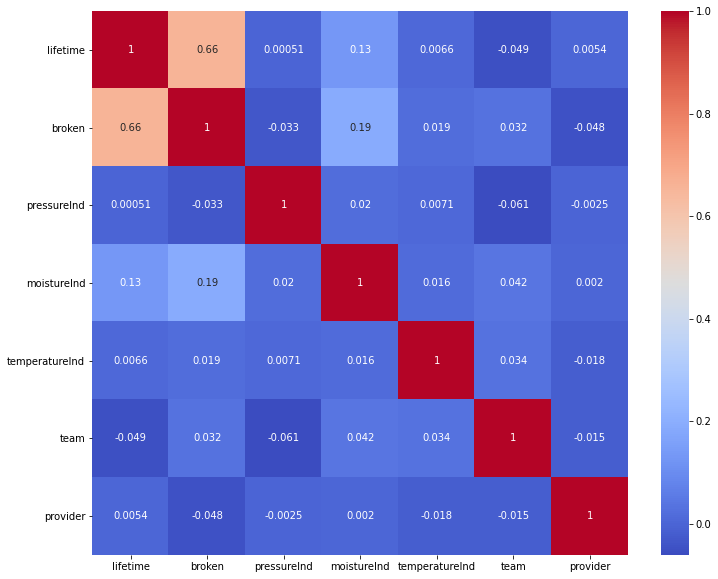

In [155]:
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

From the heatmap, we can see the team that handing machine is uncorrelated with the lifetime of the machine. So we can't predict this.
Also, notice the 'broken' vs 'lifetime', it shows some correlation, but I don't think it's valid because 'broken' is a categorical variable and MAYBE it's just a coincidence.

In [160]:
# from sklearn.linear_model import LogisticRegression

# model = LogisticRegression())

In [165]:
!git init
!git commit -m "first commit"
!git remote add origin https://github.com/NovitaGuok/Data-Analytics-Project-BootUp.git
!git push -u origin master

Reinitialized existing Git repository in /media/novitaguok/New Volume/Bootup.ai/my_project_env/.git/
On branch master

Initial commit

Untracked files:
	.ipynb_checkpoints/
	Case Study Project.ipynb
	Graph_univariate_Age.png
	Graph_univariate_Balance.png
	Graph_univariate_CreditScore.png
	Graph_univariate_EstimatedSalary.png
	Graph_univariate_NumOfProducts.png
	Graph_univariate_Tenure.png
	Graph_univariate_lifetime.png
	Graph_univariate_moistureInd.png
	Graph_univariate_pressureInd.png
	Graph_univariate_temperatureInd.png
	Novita -- Data Analytics Project Bootup.ai.ipynb
	Predict.ipynb
	bin/
	data/
	etc/
	lib/
	maintenance_data.csv
	pyvenv.cfg
	share/
	static/

nothing added to commit but untracked files present
fatal: remote origin already exists.
error: src refspec master does not match any.
error: failed to push some refs to 'https://github.com/NovitaGuok/Data-Analytics-Project-BootUp.git'
